X shape: (400, 4096)


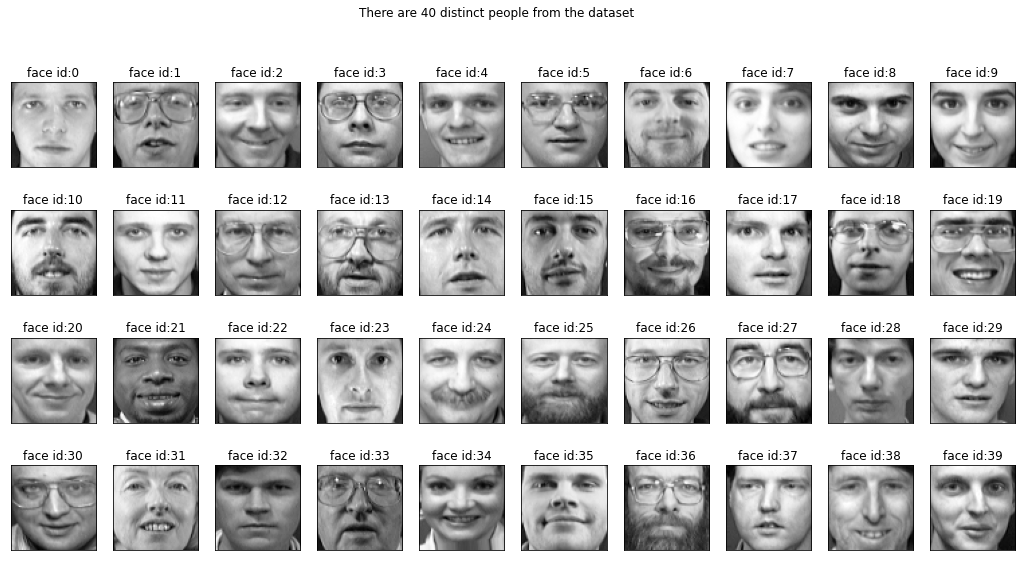

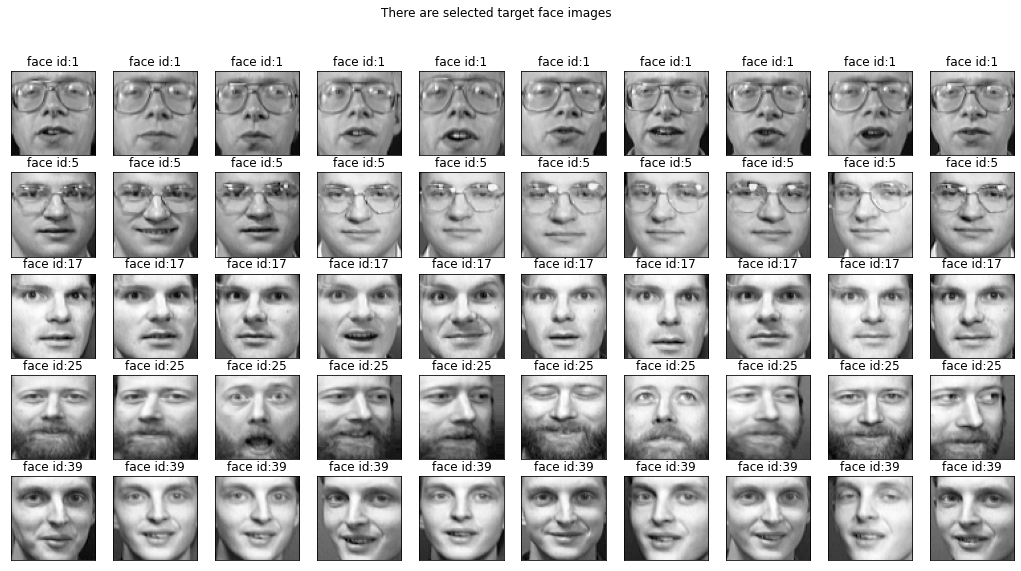

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt #drawing figures
from sklearn.decomposition import PCA #reduces the dimensionality of a large data set
from sklearn.metrics import classification_report#print the result of prediction
from sklearn.model_selection import train_test_split #split dataset into train/test
from sklearn.svm import SVC #Support Vector Classification is based on libsvm.
from sklearn.tree import DecisionTreeClassifier #A tree structure is constructed that breaks the dataset down into smaller subsets 
    #"eventually resulting in a prediction.
from sklearn.naive_bayes import GaussianNB #Can perform online updates to model parameters via partial_fit.
from sklearn.neighbors import KNeighborsClassifier #the KNeighborsClassifier(KNN) looks for the default 5 nearest neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.model_selection import cross_val_score #show classifaction results
from sklearn.model_selection import KFold

#system to read dataset file
import os
#load datasets, The data set contains 10 face images for 40 subjects.
data=np.load("olivetti_faces.npy")
target=np.load("olivetti_faces_target.npy")

#print 40 distinct people from 400 face images in the dataset
def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 10 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people from the dataset")
show_40_distinct_people(data, np.unique(target))

#show 10 face images from selected target dataset
def show_10_faces_of_n_subject(images, subject_ids):
    cols=10# each subject has 10 distinct face images
    rows=(len(subject_ids)*10)/cols #
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    #axarr=axarr.flatten()
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))
    plt.suptitle("There are selected target face images")
#we can type-in different subject_ids to see other people faces
show_10_faces_of_n_subject(images=data, subject_ids=[1,5, 17, 25, 39])

#Machine learning model can work on vectors.
#the image data is the matrix form, we need reshape images to a vector.
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("X shape:",X.shape)

#split data into random train and test subsets.
#in the 400 images, 70% will be used for training and 30% will be used for testing
#So, there will be 7 training images and 3 test images for each subjects.
# We can change the training and test rate if necessary
X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.3, stratify=target, random_state=0)




Principle Component Analysis (PCA) is a method that allows data to be represented in a lesser size. According to this method, 
the data is transformed to new components and the size of the data is reduced by selecting the most important components.

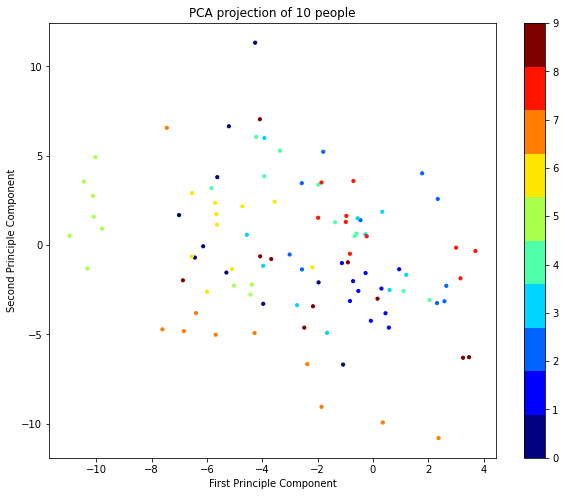

In [3]:
#PCA projection of defined number of target
pca=PCA(n_components=2)
pca.fit(X)
X_pca=pca.transform(X)

number_of_people=10
index_range=number_of_people*10
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_pca[:index_range,0],
            X_pca[:index_range,1], 
            c=target[:index_range],
            s=10,
           cmap=plt.get_cmap('jet', number_of_people)
          )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

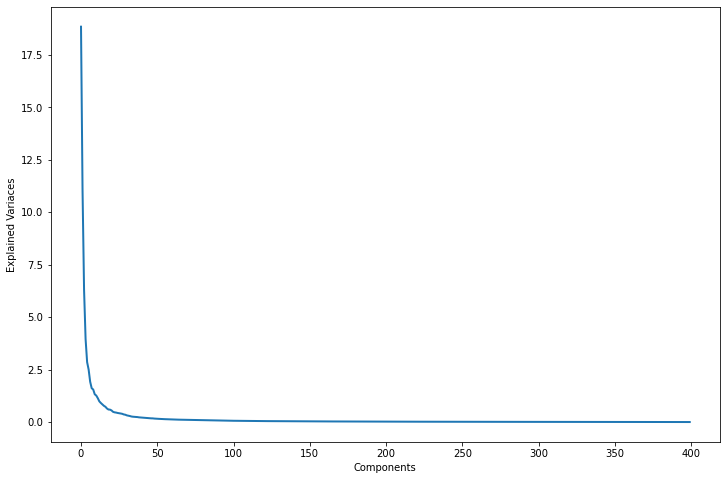

In [4]:
#Finding Optimum Number of Principle Component
pca=PCA()
pca.fit(X)

plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

Right now, we can make the classification process using 90 PCA components. Why 90? 
in the figure above, we can be seen that more than 90 PCA components represent the
same data

In [5]:
#number of components
n_components=90

pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train)

PCA(n_components=90, whiten=True)

Text(0.5, 1.0, 'Average Face')

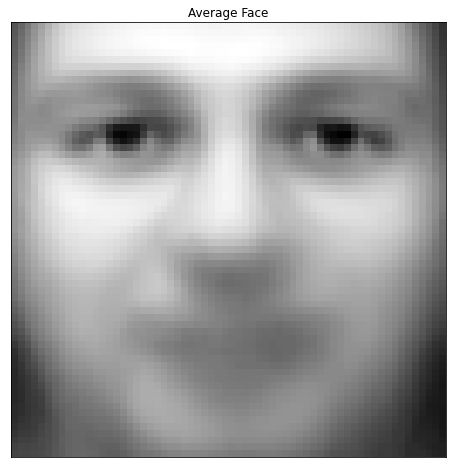

In [6]:
#from previous steps, that machine has the basic ability to show an average face,
#based on those 400 samples.
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

Eigenfaces can be regarded as a set of "standardized facial components,"
derived from a statistical analysis of many facial pictures. It's the most important part for pca

Text(0.5, 0.98, 'All Eigen Faces')

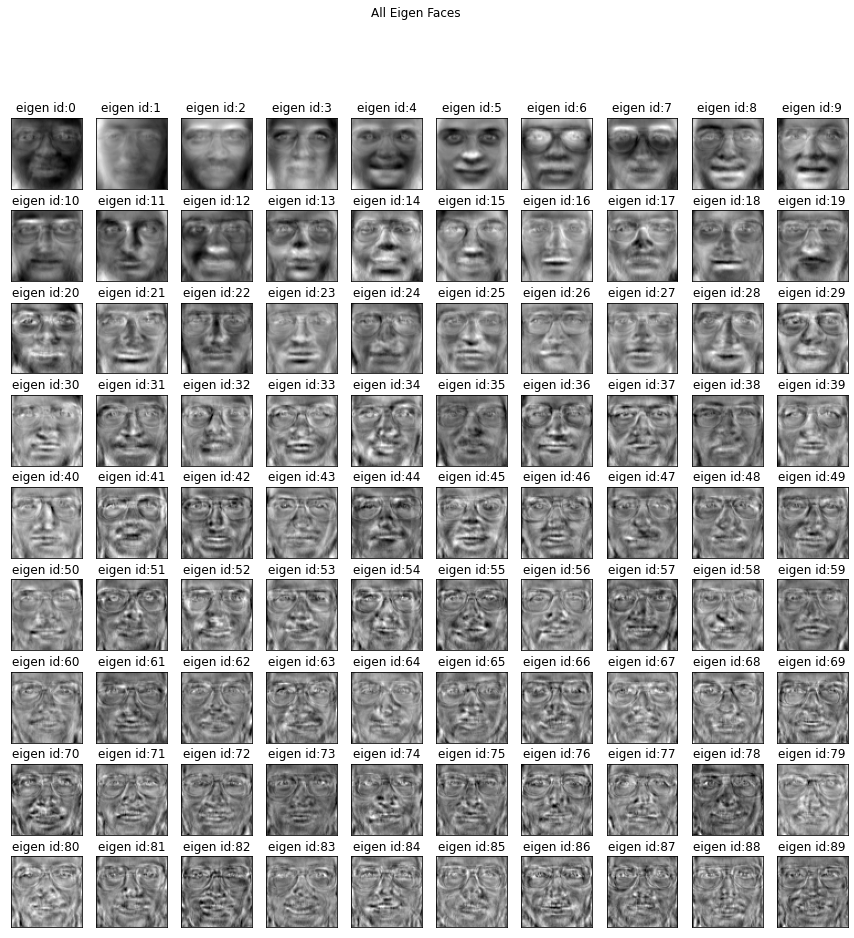

In [7]:
#Show Eigen Faces
number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, data.shape[1], data.shape[2]))

cols=10
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

In [8]:
#show classfication and prediction results
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

clf = SVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

models=[]
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier(n_neighbors=5)))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))


pca=PCA(n_components=n_components, whiten=True)
pca.fit(X)
X_pca=pca.transform(X)
for name, model in models:
    kfold=KFold(n_splits=5, shuffle=True, random_state=0)
    
    cv_scores=cross_val_score(model, X_pca, target, cv=kfold)
    print("{} mean cross validations score:{:.2f}\n".format(name, cv_scores.mean()))

print("Classification Results:\n{}".format(metrics.classification_report(y_test, y_pred)))

accuracy score:0.92
LDA mean cross validations score:0.97

LR mean cross validations score:0.94

NB mean cross validations score:0.78

KNN mean cross validations score:0.72

DT mean cross validations score:0.47

SVM mean cross validations score:0.87

Classification Results:
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       1.00      1.00      1.00         3
           2       0.50      0.67      0.57         3
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      0.67      0.80         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.0